In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
from matplotlib.font_manager import FontProperties
from IPython.display import HTML as html_print
from termcolor import colored
from scipy import stats

In [ ]:
pip install folium

In [ ]:
pip install termcolor

In [ ]:
pip install plotly

In [ ]:
conda install geopandas

In [19]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [31]:
df_3 = pd.read_csv("03 modern-renewable-prod.csv")

In [23]:
df_3.head()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000,0.310,0.000,0.000
1,Afghanistan,AFG,2001,0.000,0.500,0.000,0.000
2,Afghanistan,AFG,2002,0.000,0.560,0.000,0.000
3,Afghanistan,AFG,2003,0.000,0.630,0.000,0.000
4,Afghanistan,AFG,2004,0.000,0.560,0.000,0.000


In [25]:
df_3.tail()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000,3.970,0.010,0.320
8847,Zimbabwe,ZWE,2018,0.000,5.050,0.020,0.390
8848,Zimbabwe,ZWE,2019,0.000,4.170,0.030,0.380
8849,Zimbabwe,ZWE,2020,0.000,3.810,0.030,0.350
8850,Zimbabwe,ZWE,2021,0.000,4.000,0.040,0.380


In [27]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def display_head_and_tail(dataframe, head=5):
    display(dataframe.head(head).style.set_caption("Head"))
    display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
    na_df = dataframe.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA']
    display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def check_df(dataframe, head=5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Head & Tail')
    display_head_and_tail(dataframe, head)
    print_section_title('NA Values')
    display_na(dataframe)
    print_section_title('Quantiles')
    display_quantiles(dataframe)

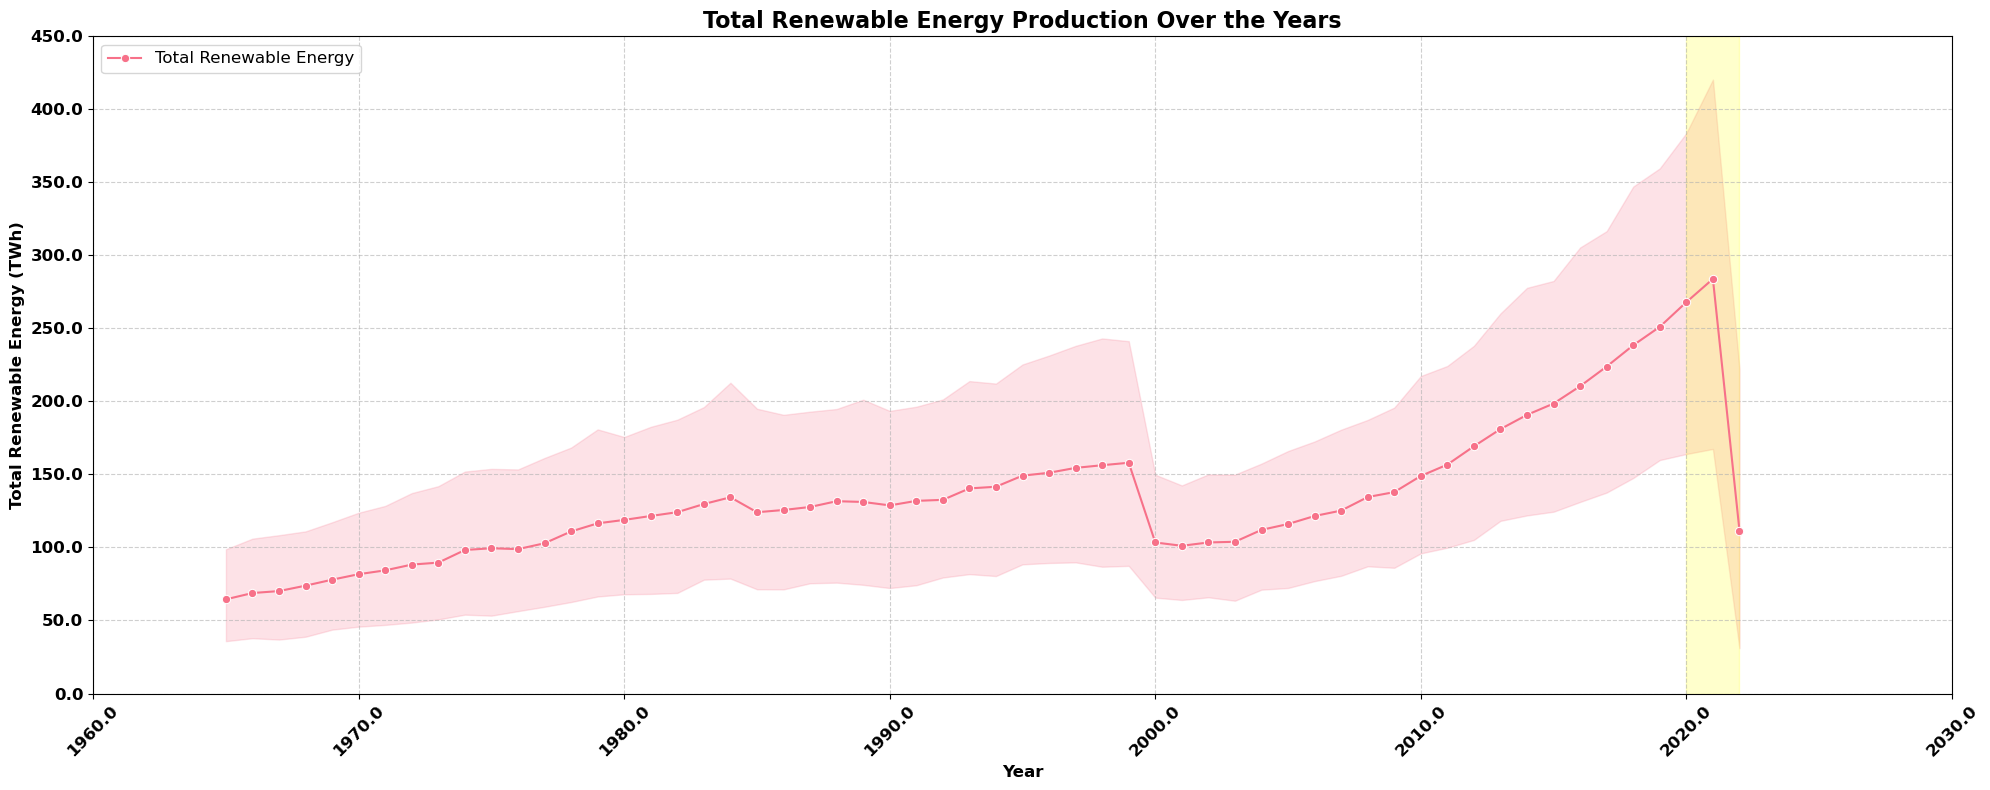

In [29]:
df_3['Total Renewable (TWh)'] = df_3[['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']].sum(axis=1)

colors = sns.color_palette("husl")

fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(x='Year', y='Total Renewable (TWh)', data=df_3, marker='o', color=colors[0], ax=ax, label='Total Renewable Energy')

max_point = df_3[df_3['Total Renewable (TWh)'] == df_3['Total Renewable (TWh)'].max()]
ax.annotate(f"Max: {max_point['Year'].values[0]}", 
            xy=(max_point['Year'].values[0], max_point['Total Renewable (TWh)'].values[0]), 
            xytext=(-50, 50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', lw=1),
            fontsize=12)

plt.title('Total Renewable Energy Production Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Renewable Energy (TWh)', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)

ax.axvspan(max_point['Year'].values[0] - 1, max_point['Year'].values[0] + 1, alpha=0.2, color='yellow')

font = FontProperties()
font.set_weight('bold')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontproperties=font)
ax.set_yticklabels(ax.get_yticks(), fontproperties=font)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

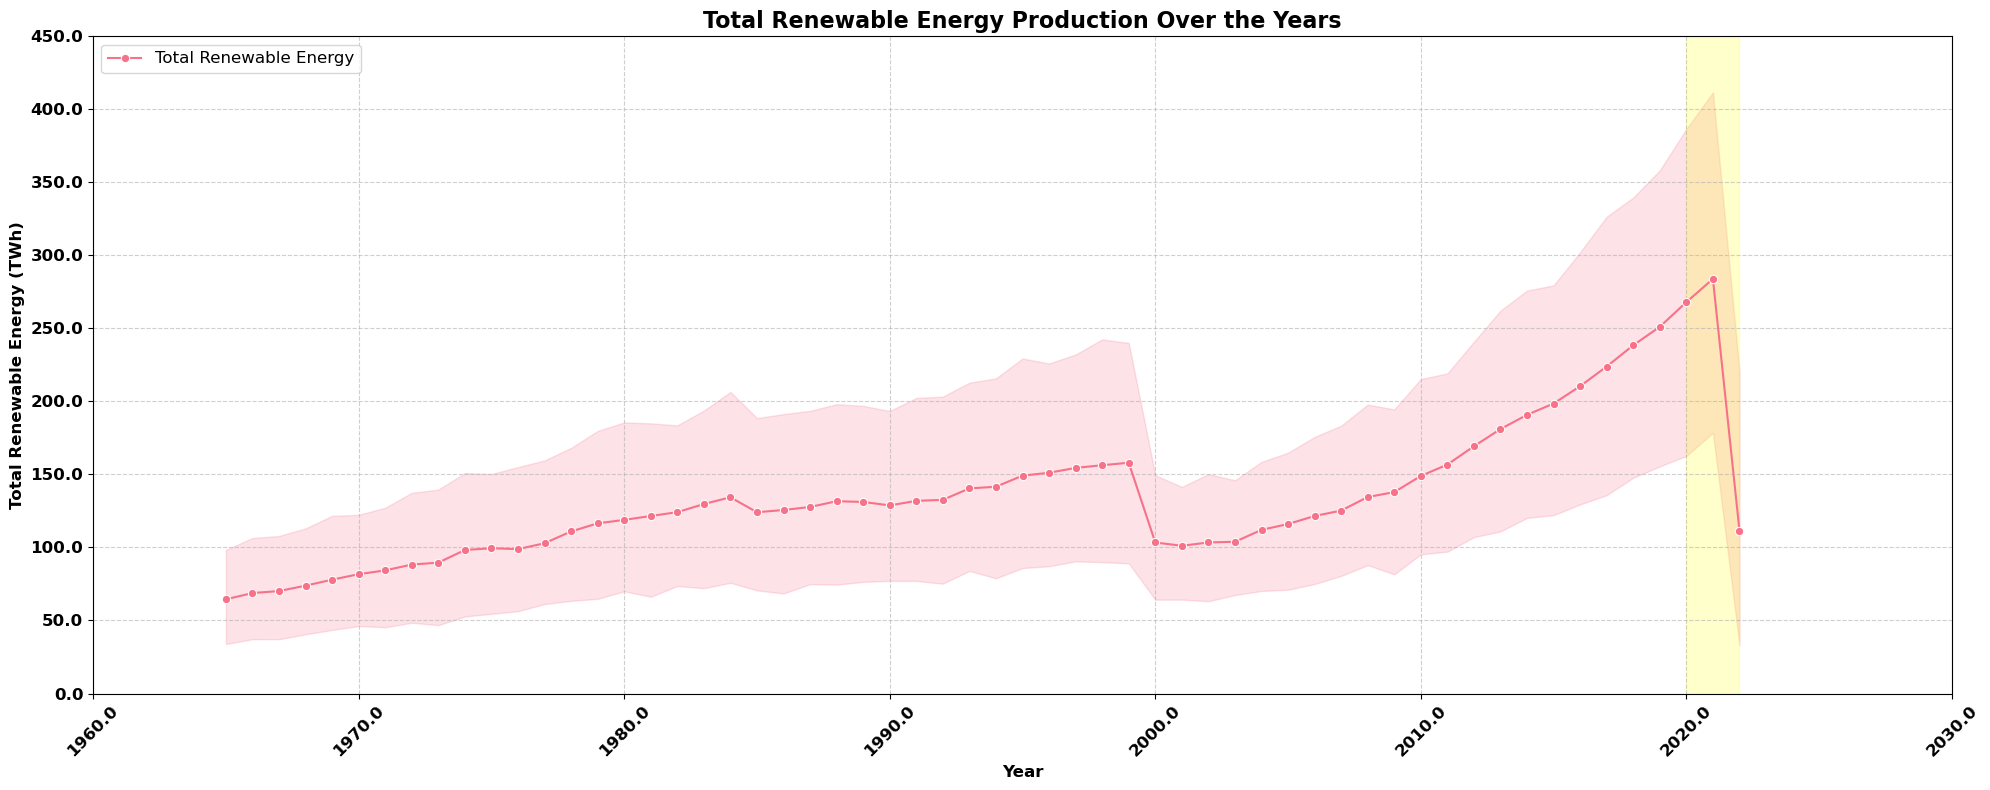

In [33]:
df_3['Total Renewable (TWh)'] = df_3[['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']].sum(axis=1)

colors = sns.color_palette("husl")

fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(x='Year', y='Total Renewable (TWh)', data=df_3, marker='o', color=colors[0], ax=ax, label='Total Renewable Energy')

max_point = df_3[df_3['Total Renewable (TWh)'] == df_3['Total Renewable (TWh)'].max()]
ax.annotate(f"Max: {max_point['Year'].values[0]}", 
            xy=(max_point['Year'].values[0], max_point['Total Renewable (TWh)'].values[0]), 
            xytext=(-50, 50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', lw=1),
            fontsize=12)

plt.title('Total Renewable Energy Production Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Renewable Energy (TWh)', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)

ax.axvspan(max_point['Year'].values[0] - 1, max_point['Year'].values[0] + 1, alpha=0.2, color='yellow')

font = FontProperties()
font.set_weight('bold')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontproperties=font)
ax.set_yticklabels(ax.get_yticks(), fontproperties=font)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [37]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

latest_data = df_3.sort_values('Year').groupby('Entity').last().reset_index()

latest_data['Most Used Renewable Source'] = latest_data[energy_types].idxmax(axis=1)

color_map = {
    'Electricity from wind (TWh)': 'blue',
    'Electricity from hydro (TWh)': 'green',
    'Electricity from solar (TWh)': 'orange',
    'Other renewables including bioenergy (TWh)': 'red'
}
latest_data['Color'] = latest_data['Most Used Renewable Source'].map(color_map)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(latest_data.set_index('Entity'))

color_map[np.nan] = 'lightgrey'
merged['Color'] = merged['Color'].fillna('lightgrey')

def add_legend(ax):
    legend_labels = {
        'blue': 'Wind Energy',
        'green': 'Hydropower Energy',
        'orange': 'Solar Energy',
        'red': 'Other Renewable Sources',
        'lightgrey': 'Data Missing or Not Available'
    }
    for color, label in legend_labels.items():
        ax.annotate(
            f'{label}: {color}',
            xy=(0.02, 0.02 + list(color_map.values()).index(color) * 0.03),
            xycoords='axes fraction',
            fontsize=10,
            color=color,
            weight='bold'
        )

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(color=merged['Color'], ax=ax, legend=False)
add_legend(ax)
ax.set_title('Most Used Renewable Energy Source by Countries')
ax.set_axis_off()

plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [7]:
top_countries_by_source = {}
for energy_type in energy_types:
    top_countries = latest_data.sort_values(by=energy_type, ascending=False).head(5)
    top_countries_by_source[energy_type] = top_countries[['Entity', energy_type]]

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
for i, (energy_type, df) in enumerate(top_countries_by_source.items()):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
    ax.set_title(f'Top 5 Ülkeler - {energy_type}')
    ax.set_xlabel('Üretim (TWh)')
    ax.set_ylabel('Ülke')

plt.tight_layout()
plt.show()

NameError: name 'latest_data' is not defined

In [9]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 
                'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_comparison = df_3.groupby('Year')[energy_types].sum()
growth_rates = total_renewable_comparison.pct_change().multiply(100)

plt.figure(figsize=(20, 8))

palette = sns.color_palette("tab10", len(energy_types))

for i, energy_type in enumerate(energy_types):
    sns.lineplot(data=growth_rates, x=growth_rates.index, y=energy_type, label=energy_type, color=palette[i])

plt.title('Annual Growth Rates in Renewable Energy Use', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)

plt.legend(title='Energy Sources')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


NameError: name 'df_3' is not defined

In [ ]:
selected_countries = ['Turkey', 'United States', 'China', 'Germany', 'Brazil', 'India', 'South Africa']

regional_data = latest_data[latest_data['Entity'].isin(selected_countries)]

fig = px.bar(regional_data, x='Entity', y='Total Renewable (TWh)', color='Entity',
             title='Regional Renewable Energy Production',
             labels={'Entity': 'Country', 'Total Renewable (TWh)': 'Total Renewable Energy Generation (TWh)'})

fig.show()


In [13]:
developing_countries = ['India', 'Brazil', 'Nigeria', 'Vietnam', 'Indonesia', 'Turkey']

developing_countries_data = df_3[df_3['Entity'].isin(developing_countries)]

plt.figure(figsize=(20, 10))

for country in developing_countries:
    country_data = developing_countries_data[developing_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Total Renewable (TWh)'], label=country, marker='o')

plt.title('Renewable Energy Trends in Developing Countries', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Renewable Energy Generation (TWh)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

NameError: name 'df_3' is not defined

In [11]:
developed_countries = ['China', 'United States', 'India', 'Germany', 'Brazil', 'South Africa', 'Australia', 'Russia']

developed_countries_data = df_3[df_3['Entity'].isin(developed_countries)]

plt.figure(figsize=(15, 10))

for country in developed_countries:
    country_data = developed_countries_data[developed_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Total Renewable (TWh)'], label=country, marker='o')

plt.title('Renewable Energy Trends in Developed Countries')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Generation (TWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df_3' is not defined

In [ ]:
global_renewable_production = df_3.groupby('Year')[energy_types].sum()

renewable_share = global_renewable_production.div(global_renewable_production.sum(axis=1), axis=0) * 100

colors = px.colors.qualitative.Plotly

fig = px.line(
    renewable_share,
    x=renewable_share.index,
    y=energy_types,
    labels={'index': 'Year', 'value': 'Percentage in Total Production (%)'},
    title='Relationship Between Renewable Energy Sources'
)

for i, energy_type in enumerate(energy_types):
    fig.data[i].line.color = colors[i]

fig.update_layout(legend_title_text='Energy Sources')
fig.show()

In [17]:
turkey_data = df_3[df_3['Entity'] == 'Turkey']

start_year = 2000
end_year = 2023  

data_year_range = turkey_data[(turkey_data['Year'] >= start_year) & (turkey_data['Year'] < end_year)]

sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

energy_production = data_year_range[sources].sum()

energy_df = pd.DataFrame({'Source': sources, 'Production': energy_production})
energy_df = energy_df.sort_values(by='Production', ascending=False)

fig = px.bar(
    energy_df, 
    x='Source', 
    y='Production', 
    title=f"Turkey's Electricity Generation by Energy Sources between {start_year}-{end_year-1}",
    labels={'Production': 'Electricity Generation (TWh)'}
)

colors = px.colors.qualitative.Plotly[:len(sources)]
fig.update_traces(marker=dict(color=colors))

fig.show()

NameError: name 'df_3' is not defined

In [15]:
sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

turkey_data = df_3[df_3['Entity'] == 'Turkey']

years = [2018, 2019, 2020, 2021]

plt.figure(figsize=(20, 20))
for i, year in enumerate(years):
    data_year = turkey_data[turkey_data['Year'] == year]
    energy_production = data_year[sources].values[0]
    plt.subplot(2, 2, i+1)
    patches, texts, autotexts = plt.pie(energy_production, labels=sources, autopct='%1.1f%%', startangle=140)
    
    for text in texts:
        text.set_fontsize(12)
        text.set_weight('bold')
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_weight('bold')
    
    plt.title(f'Electricity Production Distribution in Turkey for the Year {year}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

NameError: name 'df_3' is not defined

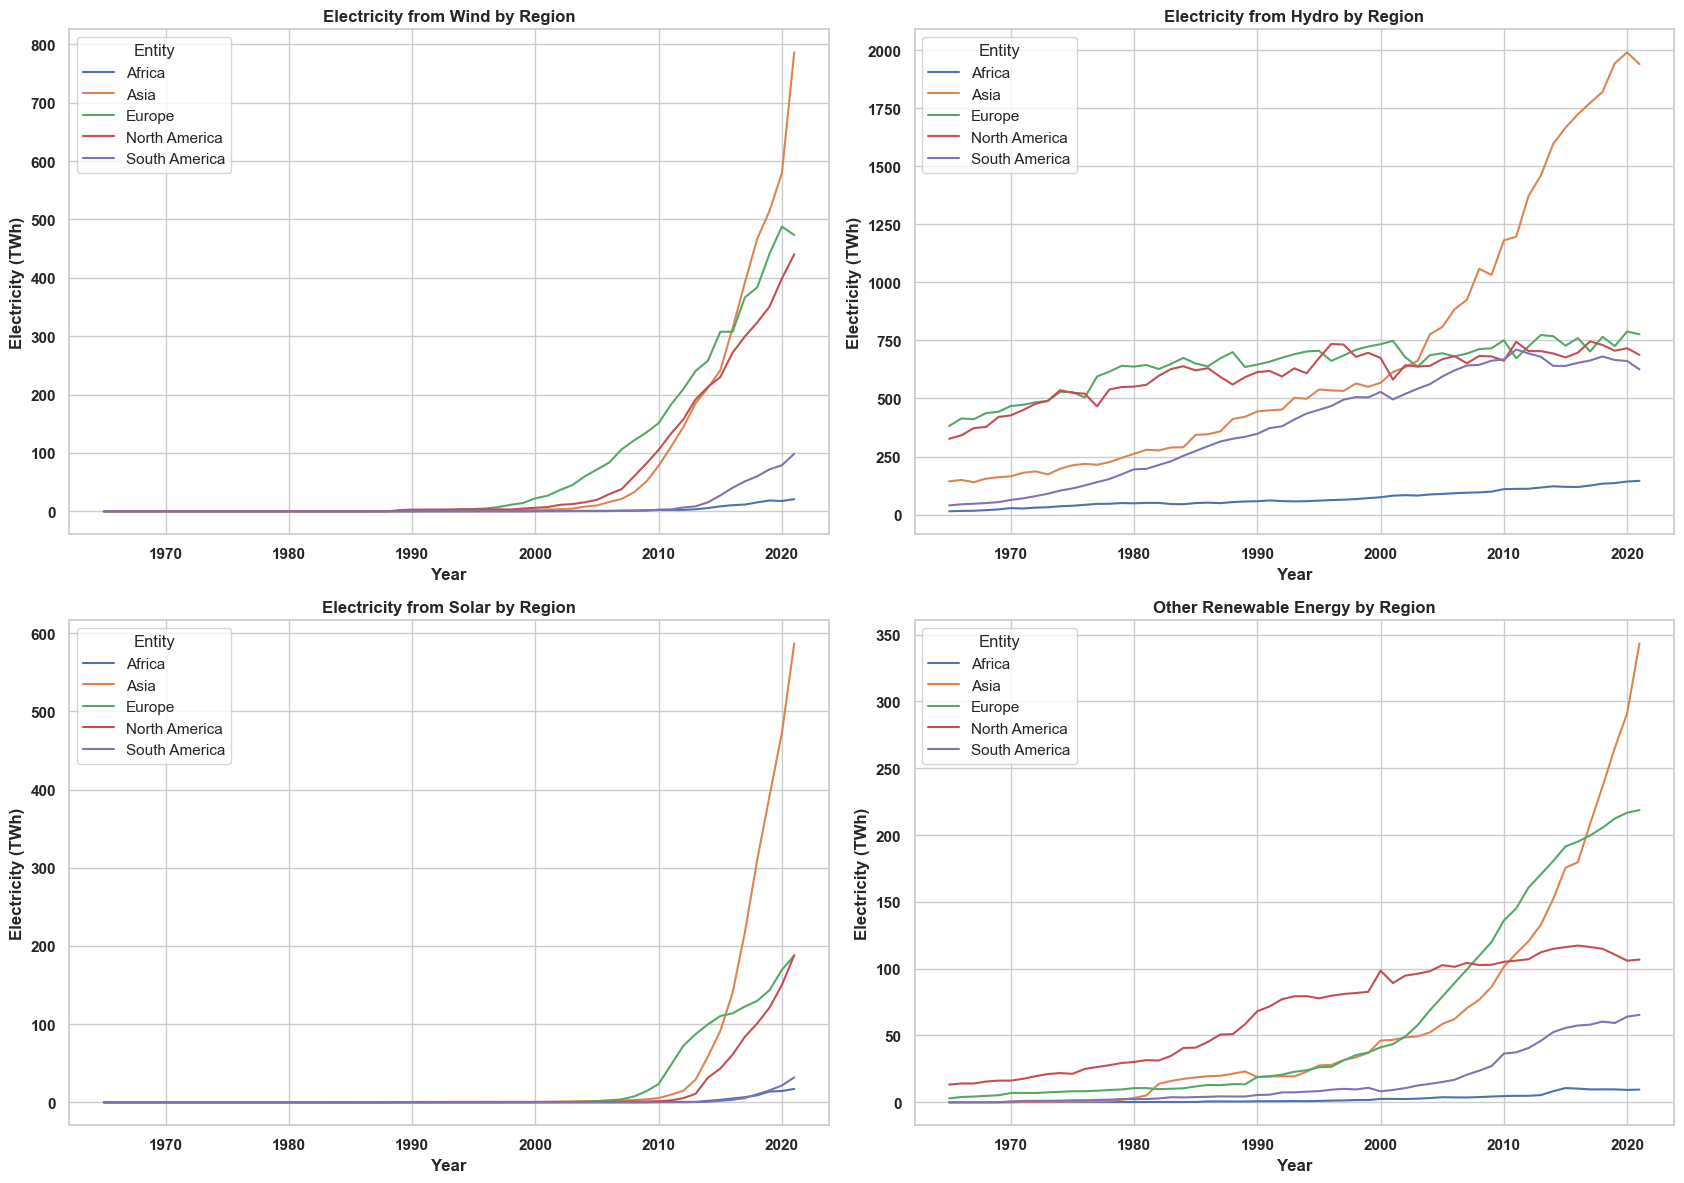

In [39]:
selected_regions = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
filtered_data = df_3[df_3['Entity'].isin(selected_regions)]

grouped_data = filtered_data.groupby(['Year', 'Entity']).sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(17, 12))

plt.subplot(2, 2, 1)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from wind (TWh)', hue='Entity')
plt.title('Electricity from Wind by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 2)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from hydro (TWh)', hue='Entity')
plt.title('Electricity from Hydro by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 3)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from solar (TWh)', hue='Entity')
plt.title('Electricity from Solar by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 4)
sns.lineplot(data=grouped_data, x='Year', y='Other renewables including bioenergy (TWh)', hue='Entity')
plt.title('Other Renewable Energy by Region', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()

Conclusion Final Thoughts & Insights: This analysis provides a comprehensive portrait of renewable energy across the globe. It delves into the evolution of renewable energy's share over time, its distribution among countries and regions, identifies leaders and laggards, and explores continental distribution and growth dynamics. The graphs vividly demonstrate the growth of renewable energy in recent years, highlighting the countries that have made significant strides, the worldwide distribution, and the continents that have either surged ahead or lagged. The analysis includes an examination of Turkey's renewable energy profile and a comparative review with European countries and neighboring regions. The increasing role of renewable energy in the global energy portfolio is evident, with growth patterns varying across the world, presenting unique trends and opportunities. This analysis furnishes valuable insights for policymakers, energy sector experts, and researchers, aiding in shaping the future of sustainable energy. 